In [1]:
# Use et2 for compatibility
from kuibit.simdir import SimDir
import kuibit.visualize_matplotlib as viz
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim = SimDir("/home/jorge/Escritorio/Lic. Física/1Ramos/1Semestre X/Tesina/Toolkit/Simulations/testPert32MoreAmp/output-0000/") 
print(sim)

Indexed 23 files and 3 subdirectories
Folder /home/jorge/Escritorio/Lic. Física/1Ramos/1Semestre X/Tesina/Toolkit/Simulations/testPert32MoreAmp/output-0000
/home/jorge/Escritorio/Lic. Física/1Ramos/1Semestre X/Tesina/Toolkit/Simulations/testPert32MoreAmp/output-0000
Available scalar timeseries:
[]

Available minimum timeseries:
[]

Available maximum timeseries:
[]

Available norm1 timeseries:
[]

Available norm2 timeseries:
[]

Available average timeseries:
['betax', 'betay', 'betaz', 'kxx', 'kxy', 'kxz', 'kyy', 'kyz', 'kzz', 'H', 'rho', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'M1', 'M2', 'M3', 'alp']
Variables available: dict_keys([])

Available grid data of dimension 1D (x): 
[]


Available grid data of dimension 1D (y): 
[]


Available grid data of dimension 1D (z): 
[]


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
['gxx', 'gxy', 'gxz', 'g

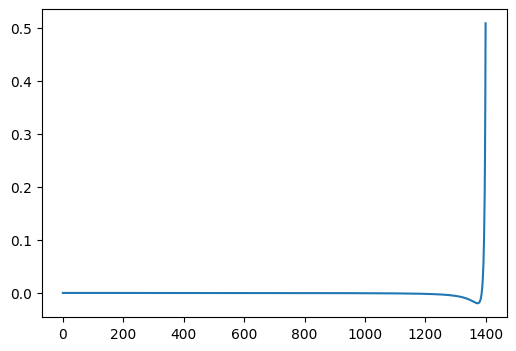

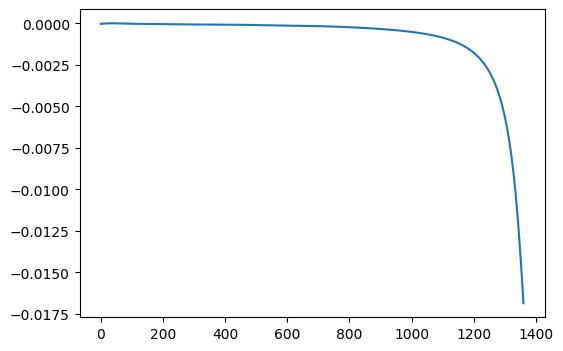

In [ ]:
# Hamiltonian
H = sim.timeseries.average['H']
#len(H.y)
plt.figure(figsize=(6,4))
plt.plot(H.y[:-11])
plt.show()
plt.figure(figsize=(6,4))               # Mark iteration 1400
plt.plot(H.y[:-50])

In [3]:
# Available iterations
sim.gf.xyz['kxx'].available_iterations

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]

In [21]:
# grid functions
k = sim.gf.xyz['kxx'][100]          # sim.gf.dim['var'][iteration]
rho = sim.gf.xyz['rho']

In [22]:
k[0][0].shape       

array([32, 32, 32])

In [23]:
k[0][0].min()

-1.3830571929119586e-05

# Initial matter density

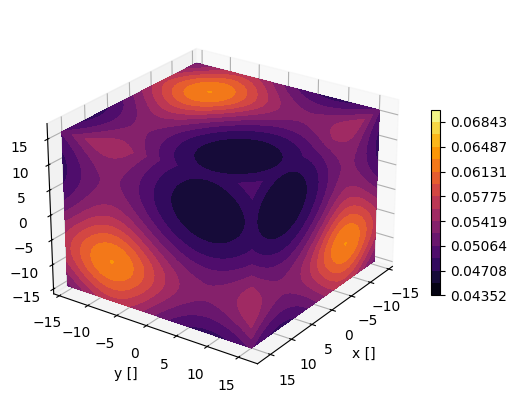

In [84]:
# Define dimensions
Nx, Ny, Nz = 32, 32, 32
X, Y, Z = np.meshgrid(np.arange(-Nx//2,Nx//2), 
                      np.arange(-Ny//2,Ny//2), 
                      np.arange(-Nz//2,Nz//2))

#X, Y, Z = np.meshgrid(np.arange(Nx), 
#                      np.arange(Ny), 
#                      np.arange(Nz))

# Create data
#data = k[0][0]
data = rho[0][0][0]

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 16),
    'cmap' : 'inferno'
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces 
# Make adjustments here to plot the other surfaces

_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],          # XY plane
    zdir='z', offset=Z.max(), **kw                  # This offset contrals position of the face
)                                                   # Check if correct            
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],          # XZ plane
    zdir='y', offset=Y.max(), **kw          
)
C = ax.contourf(
    data[:, 0, :], Y[:, 0, :], Z[:, 0, :],       # YZ plane
    zdir='x', offset=X.max(), **kw
)

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax+3], ylim=[ymin, ymax+3], zlim=[zmin, zmax+3])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
#ax.plot([xmax, xmax], [ymin, ymax+5], 0, **edges_kw)
#ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
#ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='x []',
    ylabel='y []',
    zlabel='z []',
    #zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
ax.view_init(elev=25, azim=35, roll=0)
ax.set_box_aspect(None)

# Colorbar
#fig.colorbar(C, ax=ax, fraction=0.02, pad=0.04)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.04, extend='min')


# Show Figure
#plt.savefig("rho_IN_OuterSurfaces.png", dpi=400)
plt.show()


La clave de este tipo de plots es identificar cuales son las caras que vas a mostrar, esto va a indicar qué slices debes hacer

- Listas las 3 caras exteriores, ahora necesito las 3 caras interiores
    - De alguna forma necesito cortar las superficies exteriores para poder mostrar las interiores
    - Pero solamente me deja plotear superficies cuadradas o rectangulares
- Aún falta poner los ejes y el colobar en términos de $\lambda_\text{pert}$
- Deja un pequeño borde para mejor estética (Done)
- Colorbar customization: [docs](https://matplotlib.org/3.3.1/tutorials/colors/colorbar_only.html)

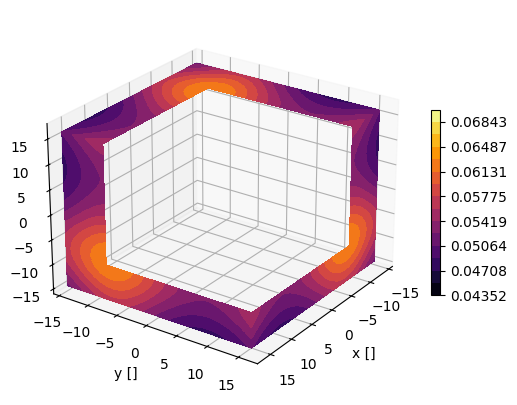

In [85]:
# Define dimensions
Nx, Ny, Nz = 32, 32, 32
X, Y, Z = np.meshgrid(np.arange(-Nx//2,Nx//2), 
                      np.arange(-Ny//2,Ny//2), 
                      np.arange(-Nz//2,Nz//2))

#X, Y, Z = np.meshgrid(np.arange(Nx), 
#                      np.arange(Ny), 
#                      np.arange(Nz))

# Create data
#data = k[0][0]
data = rho[0][0][0]

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 16),
    'cmap' : 'inferno'
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces 
# Make adjustments here to plot the other surfaces

###   XY plane   ###
xy_th=8                                             # threshold
_ = ax.contourf(
    X[:xy_th, :, 0], Y[:xy_th, :, 0], data[:xy_th, :, 0],          # XY plane
    zdir='z', offset=Z.max(), **kw                  # This offset contrals position of the face
)                                                   # Check if correct
_ = ax.contourf(
    X[:, :xy_th, 0], Y[:, :xy_th, 0], data[:, :xy_th, 0],          
    zdir='z', offset=Z.max(), **kw                  
) 

###   XZ plane   ###
xz_th=8
_ = ax.contourf(
    X[0, :xz_th, :], data[0, :xz_th, :], Z[0, :xz_th, :],          # XZ plane
    zdir='y', offset=Y.max(), **kw          
)
_ = ax.contourf(
    X[0, :, :xz_th], data[0, :, :xz_th], Z[0, :, :xz_th],          # XZ plane
    zdir='y', offset=Y.max(), **kw 
)

###   YZ plane   ###
yz_th=8
_ = ax.contourf(
    data[:yz_th, 0, :], Y[:yz_th, 0, :], Z[:yz_th, 0, :],       # YZ plane
    zdir='x', offset=X.max(), **kw
)
C = ax.contourf(
    data[:, 0, :yz_th], Y[:, 0, :yz_th], Z[:, 0, :yz_th],       # YZ plane
    zdir='x', offset=X.max(), **kw
)

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax+3], ylim=[ymin, ymax+3], zlim=[zmin, zmax+3])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
#ax.plot([xmax, xmax], [ymin, ymax+5], 0, **edges_kw)
#ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
#ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='x []',
    ylabel='y []',
    zlabel='z []',
    #zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
ax.view_init(elev=25, azim=35, roll=0)
ax.set_box_aspect(None)

# Colorbar
#fig.colorbar(C, ax=ax, fraction=0.02, pad=0.04)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.04, extend='min')


# Show Figure
#plt.savefig("rho_IN_OuterSurfaces.png", dpi=400)
plt.show()


Great, now the final step: plotting the internal surfaces

In [99]:
np.arange(-Nx//2,Nx//2)

array([-16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,
        -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15])

In [ ]:
np.arange(-Nx//2,Nx//2)[7]              #Threshold index (but it looks bad in the plot)

-9

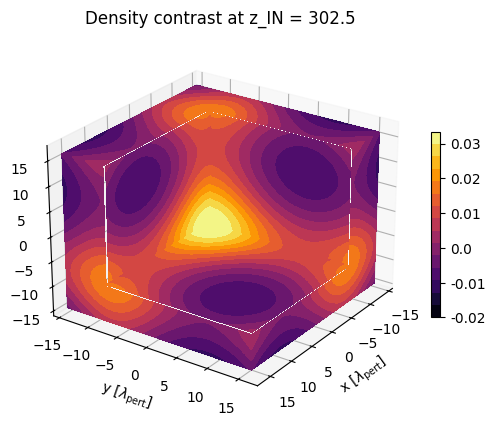

In [158]:
# Define dimensions
Nx, Ny, Nz = 32, 32, 32
X, Y, Z = np.meshgrid(np.arange(-Nx//2,Nx//2), 
                      np.arange(-Ny//2,Ny//2), 
                      np.arange(-Nz//2,Nz//2))

# Create data
#data = k[0][0]
data = rho[0][0][0]

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 16),
    'cmap' : 'inferno'
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces 
## Plot external surfaces

###   XY plane   ###
xy_th=8                                           # threshold
_ = ax.contourf(
    X[:xy_th, :, 0], Y[:xy_th, :, 0], data[:xy_th, :, 0],          # XY plane
    zdir='z', offset=Z.max(), **kw                  # This offset contrals position of the face
)                                                   # Check if correct
_ = ax.contourf(
    X[:, :xy_th, 0], Y[:, :xy_th, 0], data[:, :xy_th, 0],          
    zdir='z', offset=Z.max(), **kw                  
) 

###   XZ plane   ###
xz_th=8
_ = ax.contourf(
    X[0, :xz_th, :], data[0, :xz_th, :], Z[0, :xz_th, :],          # XZ plane
    zdir='y', offset=Y.max(), **kw          
)
_ = ax.contourf(
    X[0, :, :xz_th], data[0, :, :xz_th], Z[0, :, :xz_th],          # XZ plane
    zdir='y', offset=Y.max(), **kw 
)

###   YZ plane   ###
yz_th=8
_ = ax.contourf(
    data[:yz_th, 0, :], Y[:yz_th, 0, :], Z[:yz_th, 0, :],       # YZ plane
    zdir='x', offset=X.max(), **kw
)
C = ax.contourf(
    data[:, 0, :yz_th], Y[:, 0, :yz_th], Z[:, 0, :yz_th],       # YZ plane
    zdir='x', offset=X.max(), **kw
)


## Plot internal surfaces (still fine tunning)

###   YZ plane   ###
yz_th_i = yz_th - 1
_ = ax.contourf(
    data[yz_th_i:, yz_th, yz_th_i:], Y[yz_th_i:, yz_th, yz_th_i:], Z[yz_th_i:, yz_th, yz_th_i:],       # YZ plane
    zdir='x', offset=-yz_th-0.55, **kw
)
###   XZ plane   ###
xz_th_i = xz_th - 1
_ = ax.contourf(
    X[xz_th, xz_th_i:, xz_th_i:], data[xz_th, xz_th_i:, xz_th_i:], Z[xz_th, xz_th_i:, xz_th_i:],          # XZ plane
    zdir='y', offset=-xz_th-.55, **kw          
)

###   XY plane   ###
xy_th_i = xy_th -1 
_ = ax.contourf(
    X[xy_th_i:, xy_th_i:, xy_th], Y[xy_th_i:, xy_th_i:, xy_th], data[xy_th_i:, xy_th_i:, xy_th],          
    zdir='z', offset=-xy_th-.55, **kw                  
) 


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax+3], ylim=[ymin, ymax+3], zlim=[zmin, zmax+3])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
#ax.plot([xmax, xmax], [ymin, ymax+5], 0, **edges_kw)
#ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
#ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and ticks
ax.set(
    xlabel=r'x [$\lambda_{\text{pert}}$]',
    ylabel=r'y [$\lambda_{\text{pert}}$]',
    zlabel=r'z [$\lambda_{\text{pert}}$]'
    #xticks=[-0.5, -0.25, 0.0, 0.25, 0.5],      # First fix the coordinates
    #yticks=[-0.5, -0.25, 0.0, 0.25, 0.5],
    #zticks=[-0.5, -0.25, 0.0, 0.25, 0.5],
)

# Set zoom and angle view
ax.view_init(elev=25, azim=35, roll=0)
ax.set_box_aspect(None)

# Colorbar
#fig.colorbar(C, ax=ax, fraction=0.02, pad=0.04)
#fig.colorbar(C, ax=ax, fraction=0.02, pad=0.04, extend='min')

import matplotlib.ticker as mticker

rho_ticks = [str(i/100) for i in range(-2, 4)]
fig.colorbar(C, ax=ax, 
             ticks=list(np.linspace(0.04352,0.06847, 6)),
             format=mticker.FixedFormatter(rho_ticks),
             extend='both',
             fraction=0.02, 
             pad=0.04)           
  
plt.title('Density contrast at z_IN = 302.5')
# Show Figure
plt.savefig("rho_IN_z302.5.png", dpi=400)
plt.show()


- That looks okay, but fix those white spaces and the scales of the colorbar
- To fix the ticks of the axes, we first need to change this part 

    ```Python
    X, Y, Z = np.meshgrid(np.arange(-Nx//2,Nx//2), 
                          np.arange(-Ny//2,Ny//2), 
                          np.arange(-Nz//2,Nz//2))
    ```
and use something like `np.linspace(-0.5, 0.5, 32)`     

In [58]:
Z.max(), X.max(), Y.max(), data.max()

(0.5, 0.5, 0.5, 0.07021246192409253)

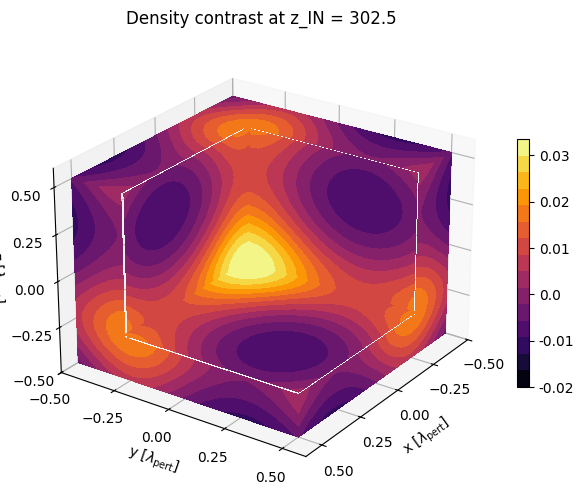

In [ ]:

# Define dimensions
Nx, Ny, Nz = 32, 32, 32
X, Y, Z = np.meshgrid(np.linspace(-0.5, 0.5, Nx), 
                      np.linspace(-0.5, 0.5, Ny), 
                      np.linspace(-0.5, 0.5, Nz))

# Create data
#data = k[0][0]
data = rho[0][0][0]

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 16),          # Maybe 12 or 14
    'cmap' : 'inferno'
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces 
## Plot external surfaces

###   XY plane   ###
xy_th=8                                           # threshold
_ = ax.contourf(
    X[:xy_th, :, 0], Y[:xy_th, :, 0], data[:xy_th, :, 0],          # XY plane
    zdir='z', offset=Z.max(), **kw                  # This offset contrals position of the face
)                                                   # Check if correct
_ = ax.contourf(
    X[:, :xy_th, 0], Y[:, :xy_th, 0], data[:, :xy_th, 0],          
    zdir='z', offset=Z.max(), **kw                  
) 

###   XZ plane   ###
xz_th=8
_ = ax.contourf(
    X[0, :xz_th, :], data[0, :xz_th, :], Z[0, :xz_th, :],          # XZ plane
    zdir='y', offset=Y.max(), **kw          
)
_ = ax.contourf(
    X[0, :, :xz_th], data[0, :, :xz_th], Z[0, :, :xz_th],          # XZ plane
    zdir='y', offset=Y.max(), **kw 
)

###   YZ plane   ###
yz_th=8
_ = ax.contourf(
    data[:yz_th, 0, :], Y[:yz_th, 0, :], Z[:yz_th, 0, :],       # YZ plane
    zdir='x', offset=X.max(), **kw
)
C = ax.contourf(
    data[:, 0, :yz_th], Y[:, 0, :yz_th], Z[:, 0, :yz_th],       # YZ plane
    zdir='x', offset=X.max(), **kw
)


## Plot internal surfaces (still fine tunning)

###   YZ plane   ###
yz_th_i = yz_th - 1 
#offset2 = -0.272
offset2 = -0.26
_ = ax.contourf(
    data[yz_th_i:, yz_th, yz_th_i:], Y[yz_th_i:, yz_th, yz_th_i:], Z[yz_th_i:, yz_th, yz_th_i:],       # YZ plane
    zdir='x', offset=offset2, **kw
)
###   XZ plane   ###
xz_th_i = xz_th - 1
_ = ax.contourf(
    X[xz_th, xz_th_i:, xz_th_i:], data[xz_th, xz_th_i:, xz_th_i:], Z[xz_th, xz_th_i:, xz_th_i:],          # XZ plane
    zdir='y', offset=offset2, **kw          
)

###   XY plane   ###
xy_th_i = xy_th -1 
_ = ax.contourf(
    X[xy_th_i:, xy_th_i:, xy_th], Y[xy_th_i:, xy_th_i:, xy_th], data[xy_th_i:, xy_th_i:, xy_th],          
    zdir='z', offset=offset2, **kw                  
) 


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax+0.1], ylim=[ymin, ymax+0.1], zlim=[zmin, zmax+0.1])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
#ax.plot([xmax, xmax], [ymin, ymax+5], 0, **edges_kw)
#ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
#ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and ticks
ax.set(
    xlabel=r'x [$\lambda_{\text{pert}}$]',
    ylabel=r'y [$\lambda_{\text{pert}}$]',
    zlabel=r'z [$\lambda_{\text{pert}}$]',
    xticks=[-0.5, -0.25, 0.0, 0.25, 0.5],      # First fix the coordinates
    yticks=[-0.5, -0.25, 0.0, 0.25, 0.5],
    zticks=[-0.5, -0.25, 0.0, 0.25, 0.5],
)

# Set zoom and angle view
ax.view_init(elev=25, azim=35, roll=0)
ax.set_box_aspect(None)

# Colorbar
#fig.colorbar(C, ax=ax, fraction=0.02, pad=0.04)
#fig.colorbar(C, ax=ax, fraction=0.02, pad=0.04, extend='min')

import matplotlib.ticker as mticker

rho_ticks = [str(i/100) for i in range(-2, 4)]
fig.colorbar(C, ax=ax, 
             ticks=list(np.linspace(0.04352,0.06847, 6)),
             format=mticker.FixedFormatter(rho_ticks),
             extend='max',
             fraction=0.02, 
             pad=0.04)           
  
plt.title('Density contrast at z_IN = 302.5')           # actually, just rho
# Show Figure
#plt.savefig("rho_IN_OuterInerSurf.png", dpi=400)
plt.show()


## Initial density contrast

Do the same as before but for $\delta = \rho/\bar{\rho} - 1$, with $\bar{\rho}=3H^2\Omega_m/\kappa$ (FLRW background)

- $\kappa=8\pi$

- $\Omega_m$ depends on the regime. Use $\Omega_m=1$

- $H=\dot{a}(\tau)/a(\tau)$

In [ ]:
# 

# 